In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import database
from snowballing.operations import reload, work_by_varname
from snowballing.strategies import Strategy
reload()

In [2]:
reload()
frontier = {work_by_varname(x) for x in (
"dey2015a", "frew2008a", "frew2008b", "huq2013a", "lerner2014a",
"mcphillips2015a", "mcphillips2015b", "murta2014a",
"macko2012a",
)}
filter_function = lambda x: x.category == "snowball" and  not int(getattr(x, "surveyhide", 0))
filter_visited = lambda x: not int(getattr(x, "surveyhide", 0))
strategy = Strategy(frontier, filter_function, filter_visited=filter_visited).bfbf()

len(strategy.visited)

1345

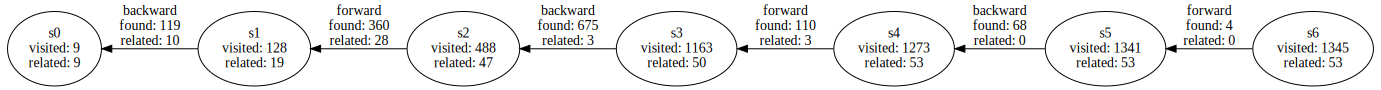

In [3]:
strategy

In [4]:
with open("output/snowballing.provn", "w") as provn:
    provn.write(strategy.provn)

In [5]:
!provconvert.bat -infile output/snowballing.provn -outfile output/snowballing.dot

In [6]:
with open("output/snowballing.dot", "r") as prov_dot:
    text = prov_dot.read().replace('rankdir="BT";', 'rankdir="RL";')
    text = text.replace("}","""
    
        "-attrs12" -> "http://example.org/start" [style=invis]
        "http://example.org/backward1" -> "-attrs12"  [style=invis]
        {rank=same "-attrs12" "http://example.org/backward1"}
        
         "http://example.org/s1"  -> "-attrs5" [style=invis]
        {rank=same "-attrs5" "http://example.org/s1"}
        
        "-attrs11"  -> "http://example.org/s1" [style=invis]
        "http://example.org/forward2" -> "-attrs11"  [style=invis]
        {rank=same "-attrs11" "http://example.org/forward2"}
        
        "http://example.org/s2"  -> "-attrs4" [style=invis]
        {rank=same "-attrs4" "http://example.org/s2"}
        
        "-attrs10"  -> "http://example.org/s2" [style=invis]
        "http://example.org/backward3" -> "-attrs10"  [style=invis]
        {rank=same "-attrs10" "http://example.org/backward3"}
        
        "http://example.org/s3"  -> "-attrs3" [style=invis]
        {rank=same "-attrs3" "http://example.org/s3"}
        
        "-attrs9"  -> "http://example.org/s3" [style=invis]
        "http://example.org/forward4" -> "-attrs9"  [style=invis]
        {rank=same "-attrs9" "http://example.org/forward4"}
        
        "http://example.org/s4"  -> "-attrs2" [style=invis]
        {rank=same "-attrs2" "http://example.org/s4"}
        
        "-attrs8"  -> "http://example.org/s4" [style=invis]
        "http://example.org/backward5" -> "-attrs8"  [style=invis]
        {rank=same "-attrs8" "http://example.org/backward5"}
        
        "http://example.org/s5"  -> "-attrs1" [style=invis]
        {rank=same "-attrs1" "http://example.org/s5"}
        
        "-attrs7"  -> "http://example.org/s5" [style=invis]
        "http://example.org/forward6" -> "-attrs7"  [style=invis]
        {rank=same "-attrs7" "http://example.org/forward6"}
        
        "http://example.org/s6"  -> "-attrs0" [style=invis]
        {rank=same "-attrs0" "http://example.org/s6"}
        
        
        }
    """)
print(text.count("}"))
with open("output/snowballing.dot", "w") as prov_dot:
    prov_dot.write(text)

13


In [7]:
!dot -Tpng output/snowballing.dot -ooutput/snowballing.png
!dot -Tsvg output/snowballing.dot -ooutput/snowballing.svg
!inkscape -D -z --file=output/snowballing.svg --export-pdf=../../csur/figs/snowballing2.pdf

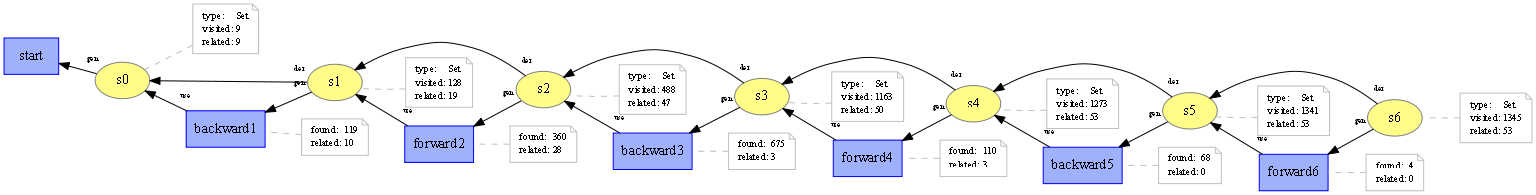

In [8]:
from IPython.display import Image
Image("output/snowballing.png")

In [9]:
visited = strategy.visited
len(visited)

1345

In [10]:
len([x for x in visited if x.category in {"snowball"}])

53

In [11]:
from snowballing.approaches import get_approaches
all_approaches = get_approaches()
script = [(a, m) for a, m in all_approaches if not m["binary"]]
binary = [(a, m) for a, m in all_approaches if m["binary"]]
len(script)

27

In [12]:
len([(x, x.year) for x in visited
     if x.category in {"nofile"}
     if x.place.name != "Tech Report"
     if x.place.name != "Book"
     if x.place.name != "Patent"
     if x.display != x.place.acronym
    ])

9

In [13]:
len([x for x in visited if x.category in {"lang"}])

20

In [14]:
len([x for x in visited if x.category in {"site"}])

138

In [15]:
len([x for x in visited
     if x.place.name == "Tech Report"
    ])

70

In [16]:
len([x for x in visited
     if x.place.name == "Book"
    ])

65

In [17]:
{x.category for x in visited}

{'binary ok',
 'binarysnowball',
 'lang',
 'nofile',
 'ok',
 'site',
 'snowball',
 'unrelated'}

In [18]:
[(x.year, x.authors, x.name, x.place.name, x.request) for x in visited
 if x.category in {"nofile"}
 if x.place.name != "Tech Report"
 if x.place.name != "Book"
 if x.place.name != "Patent"
 if x.display != x.place.acronym]

[(2009,
  'Groves, Trish',
  'Managing UK research data for future use',
  'British Medical Journal',
  'done'),
 (2015,
  'Sultana, Salmin and Bertino, Elisa',
  'A distributed system for the management of fine-grained provenance',
  'Journal of Database Management',
  'done'),
 (2012,
  'Ai, Yong and Ke, Jie and Yi, Shijie',
  'Mapping Structure and Access Control on Information Resource View',
  'Advances in Information Sciences and Service Sciences',
  'researchgate'),
 (1984,
  'Nicholson, WL and Carr, DB and Cowley, PJ and Whiting, MA',
  'The role of environments in managing data analysis',
  'American Statistical Association meetings',
  'researchgate'),
 (1983,
  'Sheil, Beau',
  'Environments for exploratory programming',
  'Datamation',
  'wont'),
 (2006,
  "Millman, K Jarrod and D\x92'Esposito, Mark",
  'Data and Analysis Management for Functional Magnetic Resonance Imaging Studies',
  'International Advanced Database Conference',
  'done'),
 (1983,
  'R.A. BECKER',
  'post

In [19]:
len(_)

9